# 將SVM的範例改成用 Random Forest 來做 Classification

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 載入iris資料集

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [6]:
X = iris.data
Y = iris.target

In [7]:
len(X)

150

In [8]:
X[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X_Petal = X[:,2:]
X_Sepal = X[:,0:2]

In [11]:
X_Petal[0]

array([ 1.4,  0.2])

In [12]:
X_Sepal[0]

array([ 5.1,  3.5])

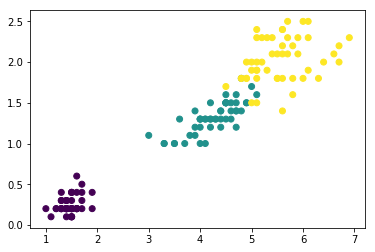

In [13]:
plt.scatter(X_Petal[:,0], X_Petal[:,1], c=Y)

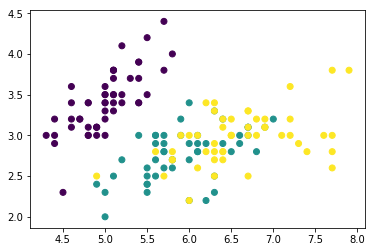

In [46]:
plt.scatter(X_Sepal[:,0], X_Sepal[:,1], c=Y)

## 產生訓練集跟測試集

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_Petal_train, x_Petal_test, y_train, y_test = train_test_split(X_Petal, Y, test_size=0.2, random_state=9487)

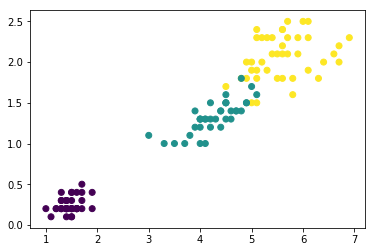

In [17]:
plt.scatter(x_Petal_train[:,0], x_Petal_train[:,1], c=y_train)

## 使用SVM來做分類

In [18]:
#1. 載入模型
from sklearn.svm import SVC

In [19]:
#2. 建立模型
clf = SVC()

In [20]:
#3. 訓練模型
clf.fit(x_Petal_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
#4. 使用模型來做預測
y_predict = clf.predict(x_Petal_test)

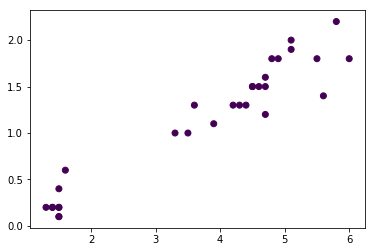

In [22]:
# 如果答對與正確答案相減為0，若畫出來有不一樣顏色則有答錯
plt.scatter(x_Petal_test[:,0], x_Petal_test[:,1], c=y_predict-y_test)

In [23]:
y_predict-y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

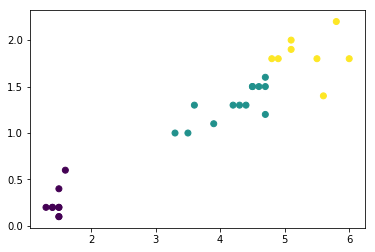

In [24]:
plt.scatter(x_Petal_test[:,0], x_Petal_test[:,1], c=y_predict)

## 使用RandomForest來做分類

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf = RandomForestClassifier(n_estimators=10)

In [39]:
clf.fit(x_Petal_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
y_predict = clf.predict(x_Petal_test)

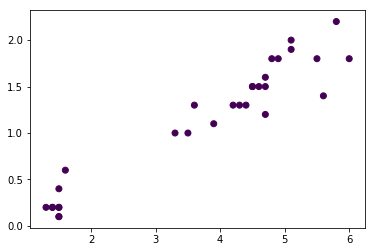

In [41]:
plt.scatter(x_Petal_test[:,0], x_Petal_test[:,1], c=y_predict-y_test)

In [42]:
y_predict-y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

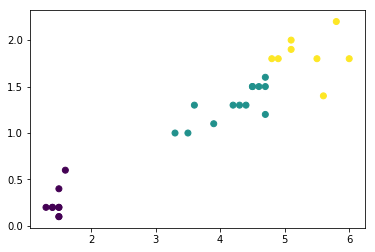

In [43]:
plt.scatter(x_Petal_test[:,0], x_Petal_test[:,1], c=y_predict)